In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('/home/aayushjoshi/ML/projects/weather-prediction-end-to-end/dataset/raw_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35004 entries, 0 to 35003
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    35004 non-null  object 
 1   temp    29037 non-null  float64
 2   dwpt    29037 non-null  float64
 3   rhum    29037 non-null  float64
 4   prcp    27528 non-null  float64
 5   snow    0 non-null      float64
 6   wdir    28613 non-null  float64
 7   wspd    29022 non-null  float64
 8   wpgt    0 non-null      float64
 9   pres    29040 non-null  float64
 10  tsun    0 non-null      float64
 11  coco    17003 non-null  float64
dtypes: float64(11), object(1)
memory usage: 3.2+ MB


In [3]:
df.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2020-03-03 01:00:00,11.0,10.1,94.0,NaN,NaN,100.0,7.0,NaN,1012.0,NaN,5.0
1,2020-03-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-03 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-03 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-03 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
34999,2024-02-29 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35000,2024-02-29 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35001,2024-02-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35002,2024-02-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35003,2024-02-29 12:00:00,20.0,7.7,45.0,NaN,NaN,294.0,7.9,NaN,1014.8,NaN,NaN


In [5]:
df.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,29037.000000,29037.000000,29037.000000,27528.000000,0.0,28613.000000,29022.000000,0.0,29040.000000,0.0,17003.000000
mean,21.548500,14.388046,67.408685,0.136083,NaN,138.474190,5.780036,NaN,1009.963970,NaN,3.791155
std,6.954679,7.053077,20.063102,0.830563,NaN,106.600211,3.348014,NaN,6.154507,NaN,3.402942
min,2.000000,-10.100000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,993.000000,NaN,1.000000
25%,16.000000,8.600000,53.000000,0.000000,NaN,44.000000,3.600000,NaN,1005.000000,NaN,1.000000
50%,23.000000,13.100000,70.000000,0.000000,NaN,83.000000,5.800000,NaN,1010.000000,NaN,3.000000
75%,26.700000,21.900000,84.000000,0.000000,NaN,237.000000,7.000000,NaN,1015.300000,NaN,5.000000
max,40.000000,29.000000,100.000000,48.700000,NaN,360.000000,124.000000,NaN,1025.100000,NaN,25.000000


In [6]:
df = df.set_index('time')
df.index = pd.to_datetime(df.index)

In [7]:
df.dropna(inplace=True, axis=1, how='all')

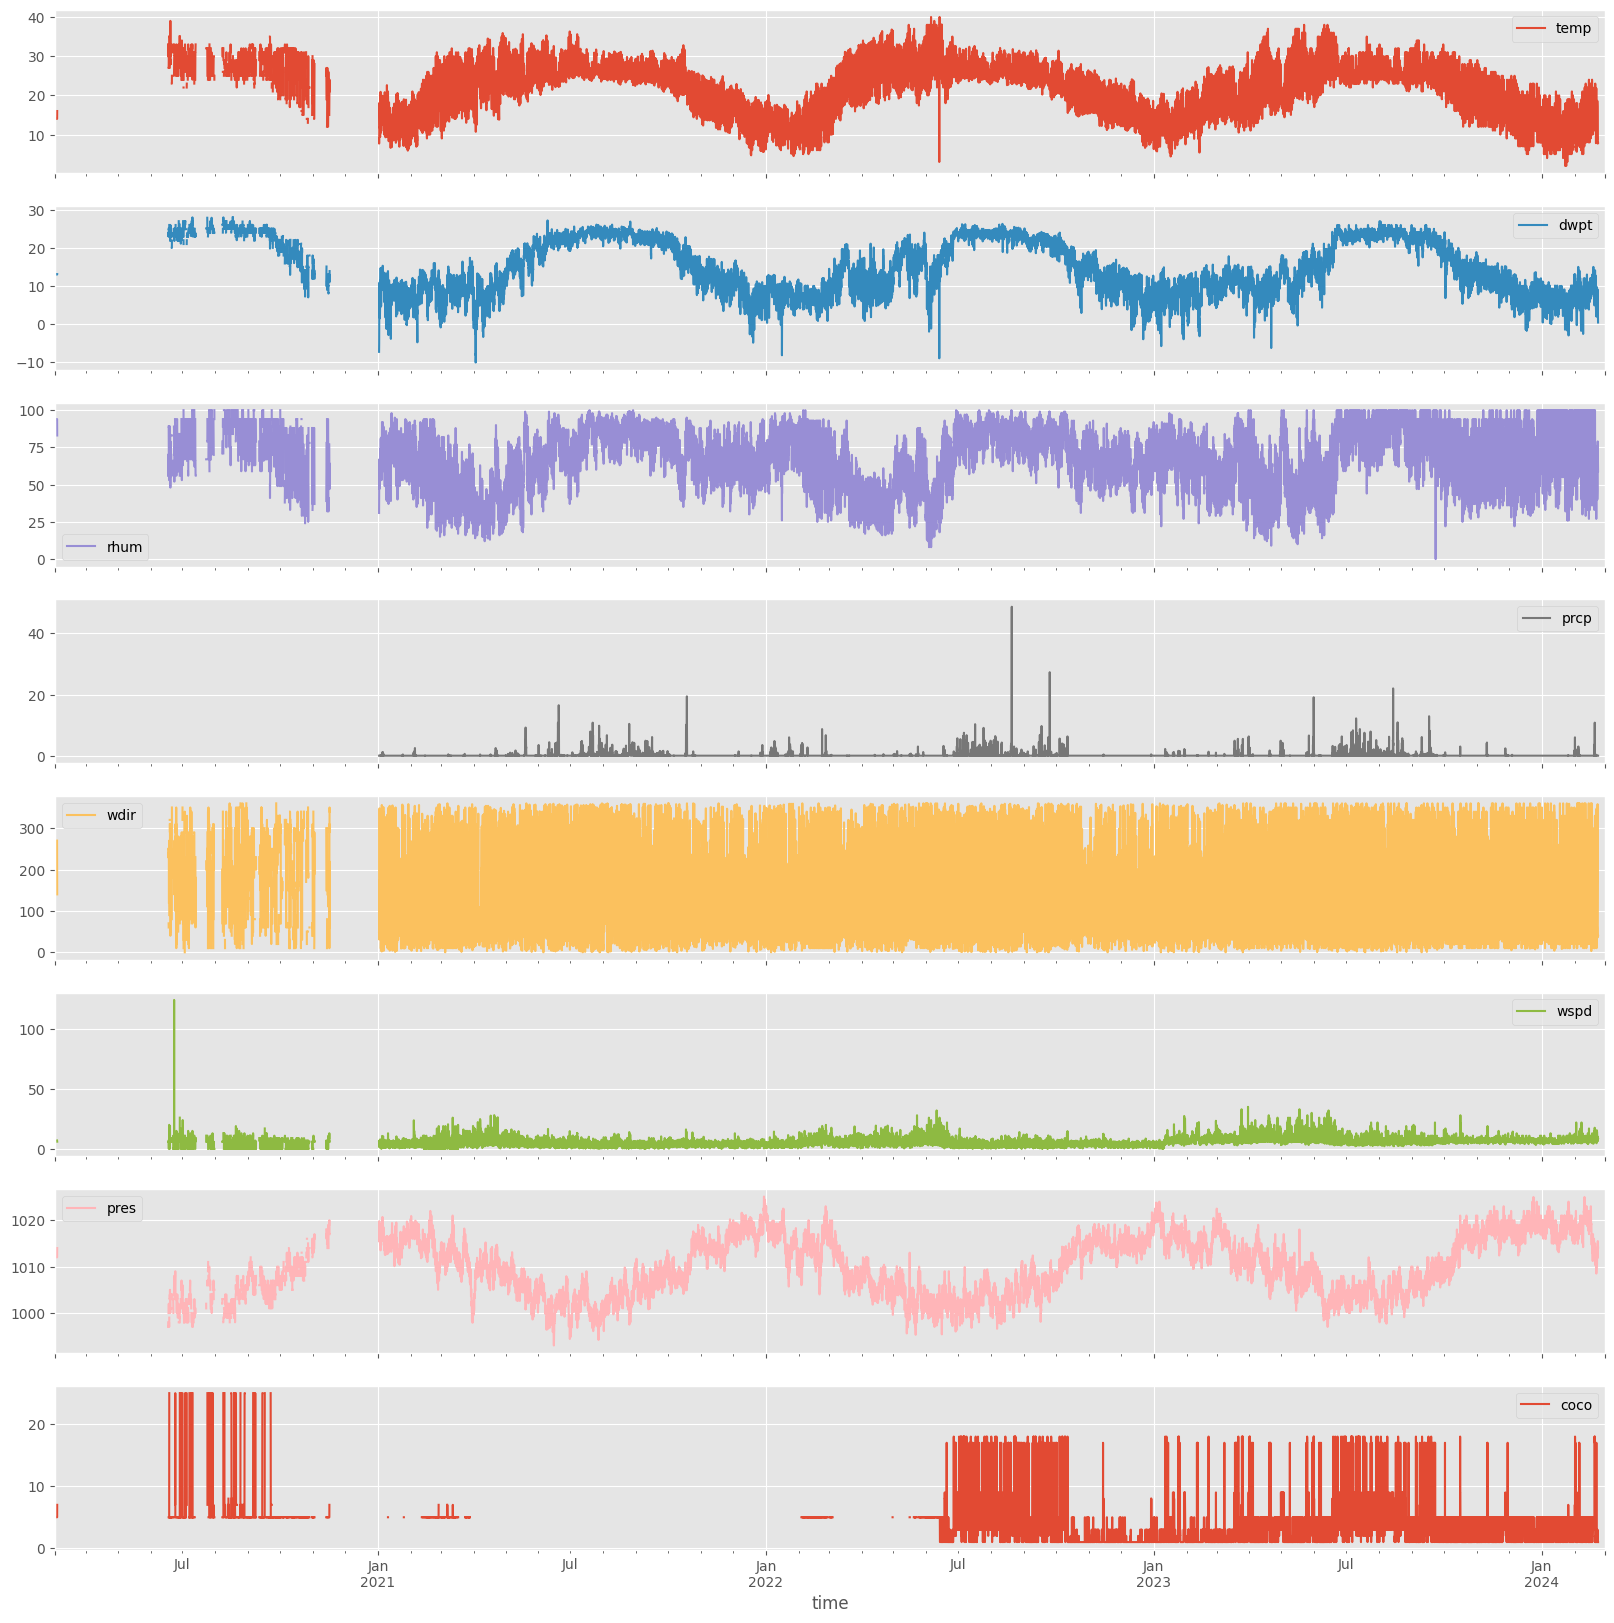

In [8]:
df.plot(subplots=True, figsize=(20,20))
plt.show()

after playing with the api we have realized that data hasnt been thoroughly collected so we would need to find since when we are able to find proper data and use that as the start date for our data collection

### creating time series features

we didn't specifically needed to create these features since we already have a good enough feature set

In [9]:
def create_features(df : pd.DataFrame) -> pd.DataFrame:
    """
    Creates time series feature from datetime index such as hour, day, month, year.
    """
    df = df.copy()
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year  
    df['hour'] = df.index.hour
    return df

In [10]:
df  = create_features(df)
no_of_features = df.shape[1] - 1

In [ ]:
df['coco'] = df['coco'].astype('int')
df = df.join(pd.get_dummies(df['coco'], dtype='int')).drop('coco', axis=1).rename(columns={1:'Clear',2:'Fair',3:'Cloudy',4:'Overcast',5:'Fog',6:'Freezing Fog',7:'Light Rain',8:'Rain',9:'Heavy Rain',10:'Freezing Rain',11:'Heavy Freezing Rain',12:'Sleet',13:'Heavy Sleet',14:'Light Snowfall',15:'Snowfall',16:'Heavy Snowfall',17:'Rain Shower',18:'Heavy Rain Shower',19:'Sleet Shower',20:'Heavy Sleet Shower',21:'Snow Shower',22:'Heavy Snow Shower',23:'Lightning',24:'Hail',25:'Thunderstorm',26:'Heavy Thunderstorm',27:'Storm'})

In [ ]:
features = df.columns[:no_of_features]
labels = df.columns[no_of_features:]

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df.columns[no_of_features:], df.sum().values[no_of_features:])
plt.title('The weather condition code')
plt.xticks(rotation=90)
plt.show()

we cant draw inference from this particular plot because it is speicific to one geoloaction that is haridwar so rather than relying on all this we should create a model that takes all the things in consideration

### train test split 

In [ ]:
# start_date = datetime(datetime.now().year - 2, datetime.now().month, datetime.now().day)
# split_date = datetime(datetime.now().year - 1, datetime.now().month, datetime.now().day)
# end_date = datetime.now()

# X_train = df.loc[start_date:split_date][features]
# X_test = df.loc[split_date:end_date][features]
# y_train = df.loc[start_date:split_date][labels]
# y_test = df.loc[split_date:end_date][labels]

In [ ]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape